## Лабораторная работа №4
### Метрические методы классификации
#### Цель работы
изучение принципов построения информационных систем с использованием метрических методов классификации.

#### Задачи
- изучение инструментария Python для реализации алгоритмов метрической классификации;
- изучение методов оптимизации параметров метрической классификации;
- освоение модификаций kNN-метода.

## Amazon Top Bestselling Books

![](./img/dataset-cover.jpg)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random



from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data_source = "datasets/bestsellers.csv"
data = pd.read_csv(data_source, delimiter=',')
data.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#### В наборе данных  представлены следующие признаки
- название книги
- автор
- рейтинг пользователей
- количество отзывов
- цена
- год выпуска
- жанр

In [3]:
data_source = "./datasets/bestsellers.csv"
data = pd.read_csv(data_source, delimiter=',')
selected_columns = ['User Rating', 'Reviews', 'Price', 'Year', 'Genre']
data_1 = data[selected_columns]
print(data_1['Genre'].unique())


random_indices = np.random.choice(data_1.index, size=50, replace=False)
data_2 = data_1.iloc[random_indices]
data_2.to_csv("random_data.csv", index=False)
data_3 = pd.read_csv("random_data.csv", delimiter=',')
data_3.dropna(inplace=True)
print(data_3.head())

['Non Fiction' 'Fiction']
   User Rating  Reviews  Price  Year        Genre
0          4.7     1542     14  2010  Non Fiction
1          4.7     5505      7  2009      Fiction
2          4.7    15779     10  2012  Non Fiction
3          4.9     7235      4  2018      Fiction
4          4.4     4247     13  2012  Non Fiction


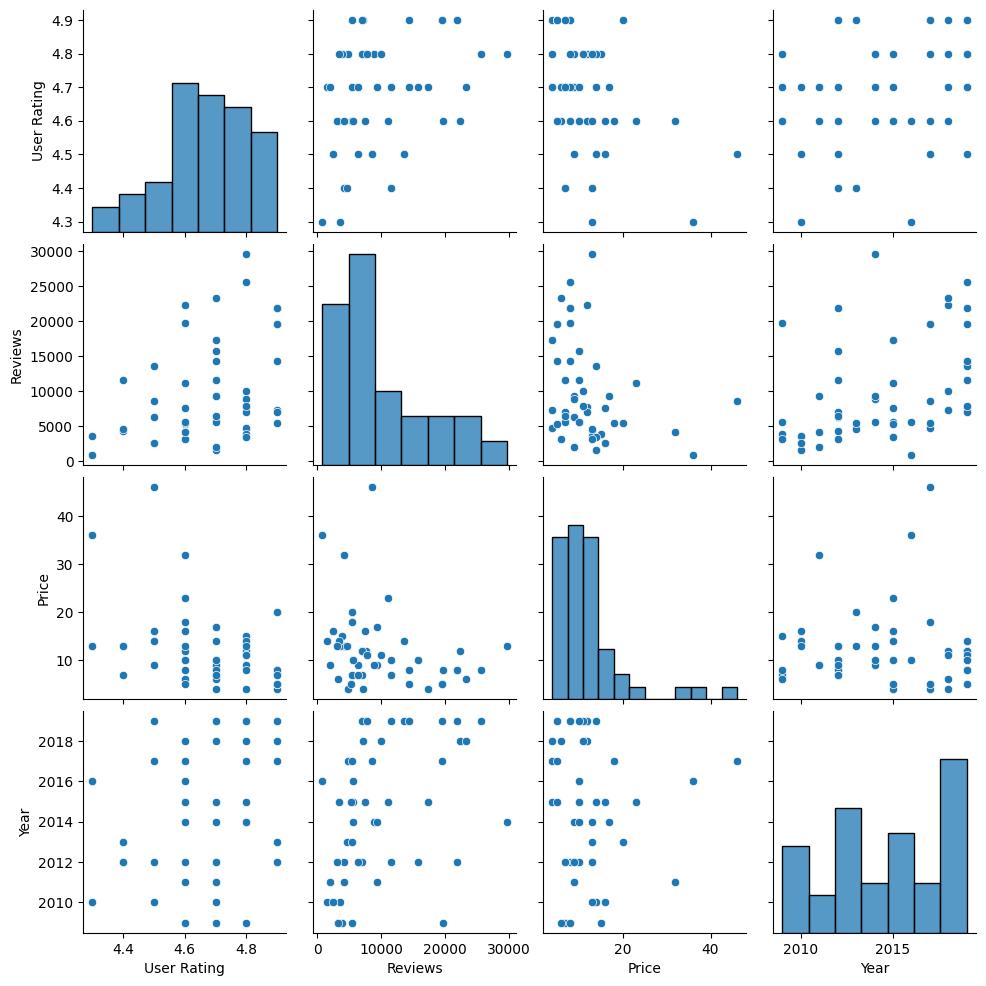

In [4]:
sns.pairplot(data_3);

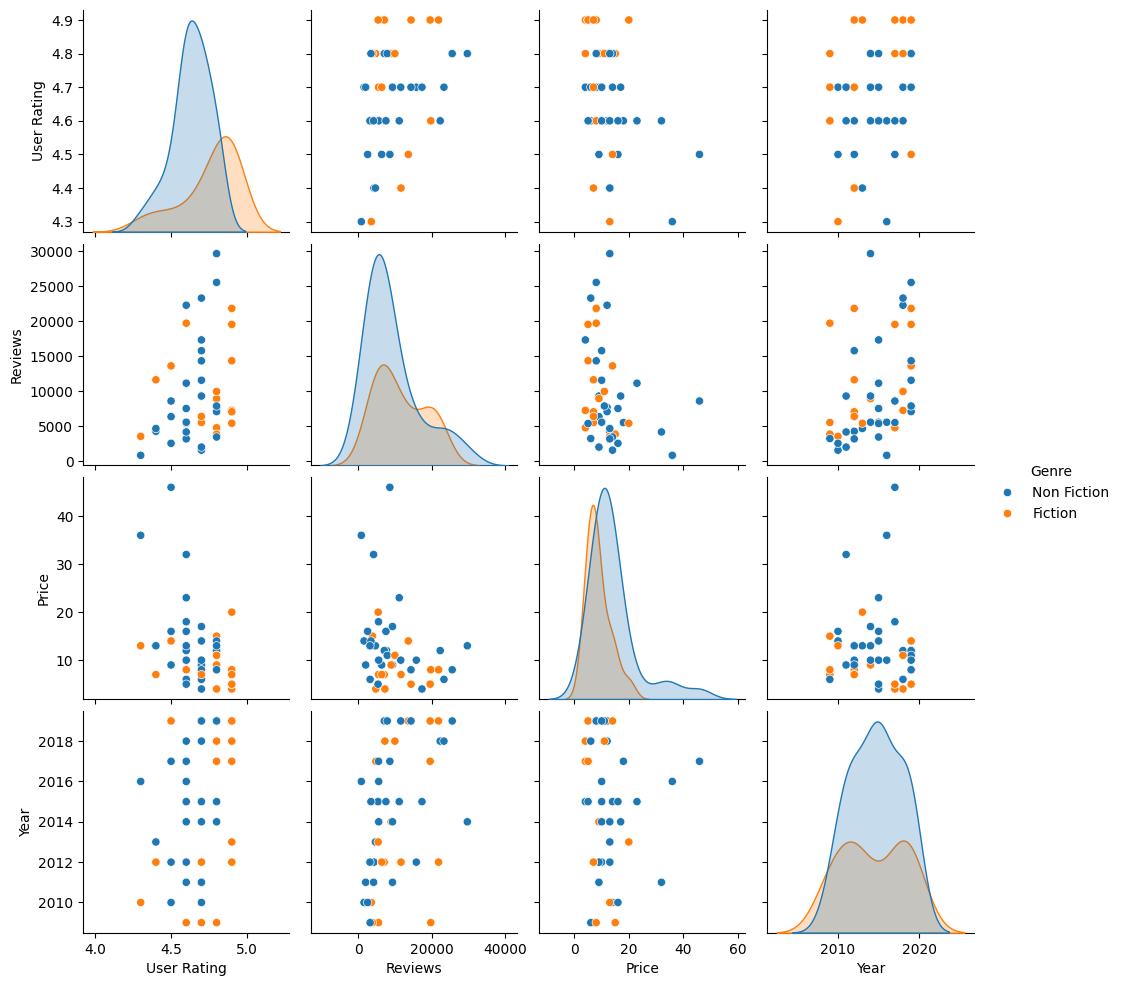

In [5]:
sns.pairplot(data_3, hue='Genre');

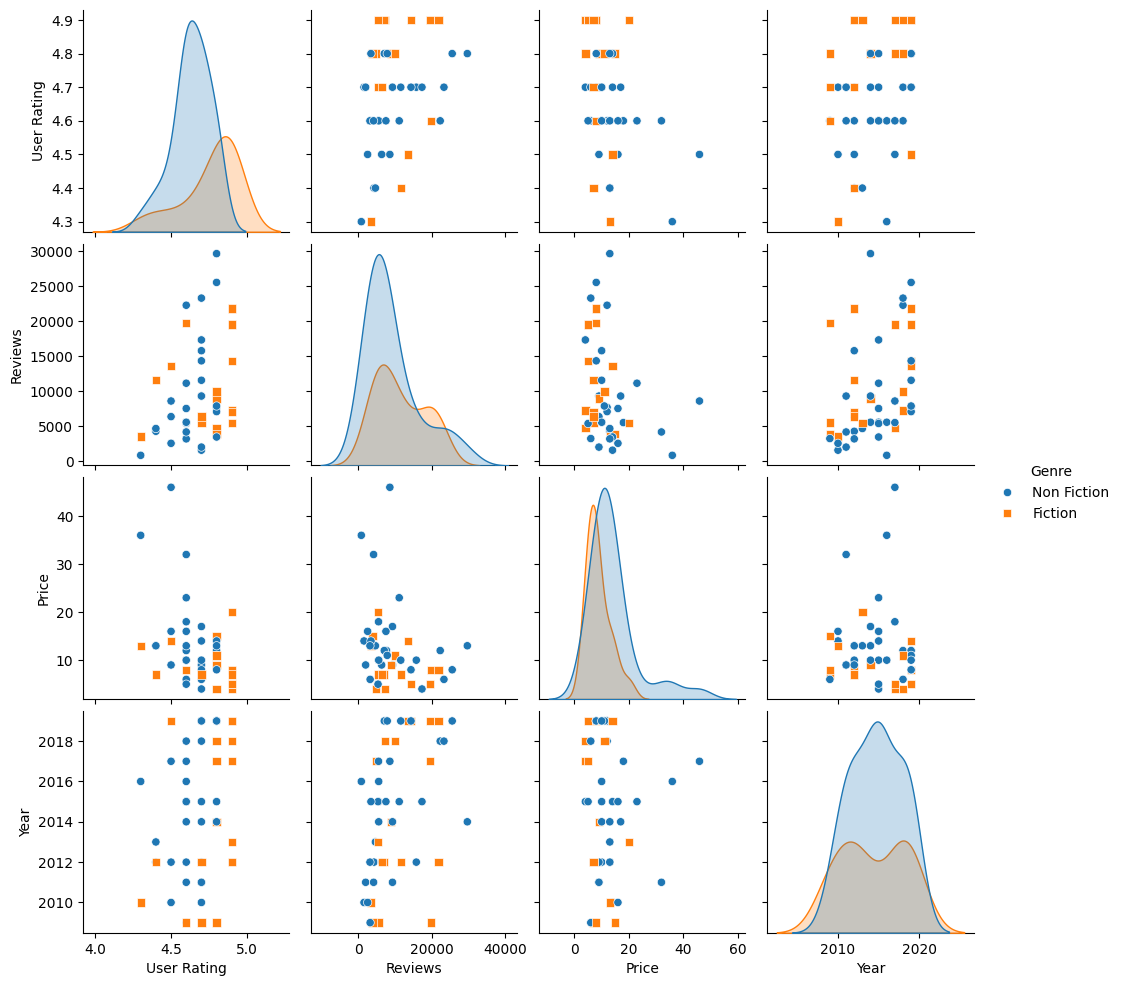

In [6]:
sns.pairplot(data_3, hue='Genre', markers=["o", "s"]);

In [7]:
from sklearn.neighbors import KNeighborsClassifier

X_train = data_3[['User Rating', 'Reviews', 'Price', 'Year']].values
y_train = data_3['Genre'].values

K = 3 # Количество соседей

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта
X_new = np.array([[3.7, 10000, 10, 2015]])
# Получение ответа для нового объекта
target = knn.predict(X_new)
print(target)

['Non Fiction']


In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = train_test_split(
    data_3[['User Rating', 'Reviews', 'Price', 'Year']], 
    data_3['Genre'], 
    test_size=0.3, 
    random_state=17)

K = 3 # Количество соседей
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.6666666666666666


Вероятность угадывания жанра равна 1/2 = 0.5, а в результате анализа получается 0.6

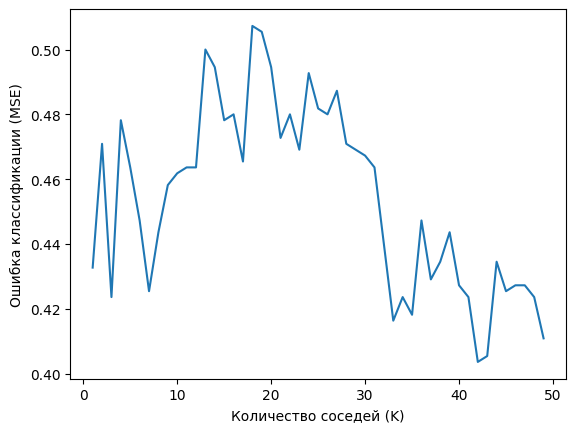

Оптимальные значения K:  [42]


In [9]:
# Реализация процедуры выбора оптимального параметра на основе cross validation error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра K
k_list = list(range(1,50))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(
        knn, 
        data[['User Rating', 'Reviews', 'Price', 'Year']], 
        data['Genre'], 
        cv=10, 
        scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)

Компьютерные возможности не позволяют вычислить следующий код!

In [12]:
# dt = data[[User Rating', 'Reviews', 'Price', 'Year']]
# dX = dt.iloc[:,0:3]
# dy = data['Genre']
# plot_markers = ['r*', 'g^']
# answers = dy.unique()

# # Создаем подграфики для каждой пары признаков
# f, places = plt.subplots(3, 3, figsize=(12,12))

# fmin = dX.min()-0.5
# fmax = dX.max()+0.5
# plot_step = 0.02  

# # Обходим все subplot
# for i in range(0,3):
#     for j in range(0,3):

#         # Строим решающие границы 
#         if(i != j):
#             xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
#                                np.arange(fmin[j], fmax[j], plot_step))
#             model = KNeighborsClassifier(n_neighbors=3)
#             model.fit(dX.iloc[:, [i,j]].values, dy.values)
#             p = model.predict(np.c_[xx.ravel(), yy.ravel()])
#             p = p.reshape(xx.shape)
#             places[i,j].contourf(xx, yy, p, cmap='Pastel1') 
      
#         # Обход всех классов
#         for id_answer in range(len(answers)):
#             idx = np.where(dy == answers[id_answer])
#             if i==j:
#                 places[i, j].hist(dX.iloc[idx].iloc[:,i],
#                                   color=plot_markers[id_answer][0],
#                                  histtype = 'step')
#             else:
#                 places[i, j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j], 
#                                   plot_markers[id_answer], 
#                                   label=answers[id_answer], markersize=6)
        
#         if j==0:
#             places[i, j].set_ylabel(dX.columns[i])
        
#         if i==3:
#             places[i, j].set_xlabel(dX.columns[j])    

In [10]:
from sklearn.neighbors import KNeighborsClassifier

X_train = data_3[['User Rating', 'Reviews', 'Price', 'Year']].values
y_train = data_3['Genre'].values

K = 13 # Найденное оптимальное значение соседей

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта

rating = float(input('Введите рейтинг: '))
reviews = float(input('Введите количетсво отзывов: '))
price = float(input('Введите цену: '))
year = float(input('Введите год: '))
#petal_width = float(input('Введите ширину лепестка: '))
X_new = np.array([[rating, reviews, price, year]])

# Получение ответа для нового объекта
target = knn.predict(X_new)
# print(target)

# if target == 0:
#     print("cl")
#     music_genre = 'Classical'
# elif target == 1:
#     print("Rap")
#     music_genre = 'Rap'

print('\n Жанр: ', target)

Введите рейтинг: 4.2
Введите количетсво отзывов: 12312
Введите цену: 33
Введите год: 1997

 Жанр:  ['Non Fiction']


### Контрольные вопросы

#### Поясните особенности основных методов метрической классификации: метод ближайшего соседа, метод k ближайших соседей.
Основные методы метрической классификации, такие как метод ближайшего соседа (1-NN) и метод k ближайших соседей (k-NN), основаны на идее определения класса объекта на основе его ближайших соседей в признаковом пространстве. Вот их основные особенности:

##### Метод ближайшего соседа (1-NN):

Для каждого объекта классификации он находит ближайшего соседа в тренировочном наборе данных, используя какую-либо метрику расстояния, обычно евклидово расстояние.
Классификация объекта происходит путем присвоения ему класса его ближайшего соседа.
1-NN склонен к переобучению и может быть шумочувствительным, так как он смотрит только на одного ближайшего соседа.
##### Метод k ближайших соседей (k-NN):

В отличие от 1-NN, k-NN находит k ближайших соседей объекта, где k - это заданное число соседей.
Объекту присваивается класс, который наиболее часто встречается среди его k ближайших соседей.
Выбор k влияет на гладкость границ решений: маленькое k приводит к сложным границам, большое k приводит к более гладким границам.
k-NN менее склонен к переобучению по сравнению с 1-NN, но может быть чувствительным к выбору k и масштабу признаков.
Особенности и недостатки методов метрической классификации:

Простота и интуитивность: Метрические методы просты в понимании и реализации.
Не требуется предварительная обработка данных: Метрические методы не требуют предварительной нормализации данных и могут работать с различными типами признаков.
Но они могут быть вычислительно затратными для больших наборов данных, так как требуется вычисление расстояний для каждой пары объектов.
Чувствительность к выбору метрики: Результаты могут сильно зависеть от выбора метрики расстояния.
Не учитывают внутреннюю структуру данных: Метрические методы не учитывают скрытую структуру данных, и их производительность может быть низкой в некоторых случаях.
Итак, методы метрической классификации, такие как 1-NN и k-NN, подходят для небольших и средних наборов данных, где они могут обеспечить хорошую производительность при правильном выборе гиперпараметров и метрик расстояния.

#### Поясните основные принципы и этапы реализации метода kNN.
Метод k-ближайших соседей (k-NN) - это простой алгоритм классификации, который классифицирует объекты на основе классов их k ближайших соседей в признаковом пространстве. Вот основные принципы и этапы реализации метода k-NN:

##### Принципы:

##### Локальность: Гипотеза локальности состоит в том, что близкие объекты в признаковом пространстве имеют схожие классы. Это предположение лежит в основе метода k-NN.

##### Метрика расстояния: Для определения ближайших соседей необходимо выбрать метрику расстояния, такую как евклидово расстояние, манхэттенское расстояние и другие. Метрика расстояния используется для измерения сходства между объектами.

##### Этапы реализации метода k-NN:

Загрузка и предобработка данных: Сначала загружаются и подготавливаются данные для обучения и тестирования. Это включает в себя разделение данных на обучающий и тестовый наборы.

Выбор метрики расстояния: Выберите метрику расстояния, которая будет использоваться для измерения расстояния между объектами в признаковом пространстве. Наиболее распространенной метрикой является евклидово расстояние.

Выбор числа соседей (k): Выберите количество ближайших соседей (k), которые будут использоваться для классификации объекта. Значение k должно быть выбрано внимательно, так как оно может влиять на результаты классификации.

Вычисление расстояний: Для каждого объекта тестового набора данных вычисляются расстояния до всех объектов обучающего набора данных с использованием выбранной метрики расстояния.

Нахождение k ближайших соседей: Для каждого объекта тестового набора данных выбираются k объектов обучающего набора данных с наименьшими расстояниями.

Классификация: Для каждого объекта тестового набора данных определяется класс, который наиболее часто встречается среди его k ближайших соседей. Этот класс присваивается объекту.

Оценка производительности: После классификации всех объектов тестового набора данных оценивается производительность метода k-NN, например, с использованием метрик точности, полноты, F1-меры и других.

Выбор оптимальных параметров: Можно выполнять подбор параметров, таких как метрика расстояния и значение k, для оптимизации производительности метода.

Метод k-NN - это относительно простой метод, который может быть эффективным для задач классификации, особенно в случаях, когда данные имеют локальную структуру. Однако для его эффективной работы необходимо правильно настроить параметры и подготовить данные.

#### Поясните принцип выбора количества соседних объектов, по которым определяется принадлежность целевого объекта к результирующему классу.
Выбор количества соседних объектов (k) в методе k-ближайших соседей (k-NN) важен и влияет на производительность алгоритма. Принцип выбора значения k определяет, сколько соседних объектов будет учтено при классификации целевого объекта. Вот некоторые ключевые моменты, которые следует учитывать при выборе значения k:

##### Маленькое k (k = 1):

Если k слишком маленькое, например, k = 1, то классификация будет сильно зависеть от одного ближайшего соседа.
Это может привести к шуму и нестабильным результатам, особенно если в данных есть выбросы или неточности.
Маленькое k может привести к сложным, нерегулярным границам решений.
##### Среднее k:

Обычно выбирают средние значения k, например, k = 3, 5 или 10.
Средние значения k обычно более устойчивы и менее склонны к переобучению по сравнению с маленькими k.
Они могут обеспечивать хороший баланс между сглаженными границами решений и точностью классификации.
##### Большое k:

Если k слишком большое, например, k равно размеру обучающей выборки, то классификация будет скорее всего соответствовать наиболее популярному классу в обучающей выборке.
Это может привести к сглаженным, гладким границам решений, но может упустить детали и разделение классов.
Процесс выбора значения k обычно включает в себя эксперименты и валидацию, например, кросс-валидацию. Вам нужно выбрать значение k, которое обеспечивает наилучшую производительность на ваших данных. Оптимальное значение k может зависеть от конкретной задачи, структуры данных и количества доступных обучающих данных.

##### Важно помнить, что выбор k - это компромисс между сглаженностью границ решений и точностью классификации, и нет универсального значения k, которое подходило бы для всех задач.

#### В чем заключается метод парзеновского окна?
Метод парзеновского окна (Parzen Window) - это один из методов, используемых для оценки плотности вероятности объектов в многомерных пространствах. Он играет важную роль в различных статистических задачах, включая классификацию, кластеризацию и оценку плотности вероятности. Основная идея метода парзеновского окна заключается в том, что объекту присваивается плотность вероятности, основанная на "окне" или "ядерной функции", которая центрируется на этом объекте и оценивается с использованием соседних объектов.

##### Вот основные принципы метода парзеновского окна:

Окно и ядерная функция: Перед использованием метода парзеновского окна нужно выбрать ядерную функцию и размер окна. Ядерная функция определяет, как вес объектов убывает с расстоянием от целевого объекта, а размер окна определяет, сколько ближайших соседей будут учтены.

Ядерная функция: Обычно в качестве ядерной функции используется гауссово ядро (гауссиана), которое имеет плотность вероятности, аналогичную нормальному распределению. Гауссово ядро имеет следующую форму: [K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}}]

Здесь (u) - расстояние между целевым объектом и соседними объектами.

Оценка плотности вероятности: Для каждого объекта оценка плотности вероятности вычисляется как взвешенная сумма ядерных функций для всех соседей. Оценка плотности вероятности объекта (x) в многомерном пространстве выглядит следующим образом: [P(x) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{h^d} K\left(\frac{|x - x_i|}{h}\right)]

Где:

(n) - количество объектов в обучающей выборке.
(h) - ширина окна (ширина ядерной функции).
(d) - количество признаков.
(x_i) - соседний объект.
Классификация или оценка плотности вероятности: В задачах классификации метод парзеновского окна может использоваться для оценки плотности вероятности объектов в разных классах. Объекту присваивается класс, который имеет наибольшую оценку плотности вероятности. В задачах оценки плотности вероятности метод может использоваться для аппроксимации плотности данных в заданной области пространства.

##### Метод парзеновского окна обладает гибкостью и может адаптироваться к различным формам данных. Однако он может быть вычислительно затратным, особенно в многомерных пространствах, и требует настройки параметров, таких как размер окна (h) и выбор ядерной функции.

#### Назовите, какие параметры оптимизируют в методах kNN?
##### В методах k-ближайших соседей (k-NN) следующие параметры обычно оптимизируют:

Количество ближайших соседей (k): Один из самых важных параметров k-NN. Выбор оптимального значения k может значительно повлиять на производительность алгоритма. Слишком маленькое k может привести к переобучению, а слишком большое k может привести к сглаженным границам решений. Количество ближайших соседей обычно подбирают с помощью кросс-валидации.

Метрика расстояния: Выбор подходящей метрики расстояния (например, евклидово расстояние, манхэттенское расстояние, косинусное расстояние и др.) может быть важным для оптимальной работы алгоритма в зависимости от типа данных и задачи.

Веса соседей: В некоторых вариантах k-NN можно вводить веса для соседей в зависимости от их расстояния до целевого объекта. Ближайшие соседи могут иметь больший вес в прогнозировании, чем более далекие.

Параметры ядра и окна (если используется метод парзеновского окна): Если вы используете метод парзеновского окна для оценки плотности вероятности, вам придется выбирать параметры ядра (например, гауссово ядро) и размер окна (ширина ядерной функции).

Обработка данных: Вы также можете оптимизировать методы предварительной обработки данных, такие как нормализация или стандартизация, чтобы улучшить производительность k-NN.

Выбор признаков: Важно выбирать подходящие признаки и исключать ненужные, чтобы уменьшить размерность данных и снизить вычислительную нагрузку.

##### В зависимости от конкретной задачи и типа данных, параметры могут быть настроены с использованием методов оптимизации, а также путем применения кросс-валидации для оценки производительности модели с разными значениями параметров.